# Levantamento de Dados Agrícolas no Brasil

In [141]:
import pandas as pd

import matplotlib.pyplot as plt

📌**Segundo o artigo:**  

<p>Normalization: Each attribute was
normalized to a range of 0–1 using the MinMaxScaler method from
scikit-learn. Normalization is a crucial step in preprocessing as it ensures
that all attributes have similar weights in the machine learning models,
preventing attributes with larger ranges from dominating the analysis.
By scaling all variables to the same range, we ensure that the model
treats each attribute equally, thus improving the overall performance
and interpretability of the results. The primary variable we aimed at
predicted was the deforestation rate (measured in km2).</p>

<p>Normalização: Cada atributo foi
normalizado para um intervalo de 0–1 usando o método MinMaxScaler de
scikit-aprender. A normalização é uma etapa crucial no pré-processamento, pois garante
que todos os atributos têm pesos semelhantes nos modelos de aprendizado de máquina,
evitando que atributos com intervalos maiores dominem a análise.
Ao dimensionar todas as variáveis ​​para o mesmo intervalo, garantimos que o modelo
trata cada atributo igualmente, melhorando assim o desempenho geral
e interpretabilidade dos resultados. A principal variável que almejamos
previsto foi a taxa de desmatamento (medida em km2).</p>

## 1. População 👥

## 2. Produção de Milho 🌽

### Carregamento do Dataset 📌 🌽

In [156]:
df_milho = pd.read_excel("Producao-Milhos/Produção - milho(R$).xls")
df_milho.head(5)

,Sigla,Codigo,Estado,1999,2000,2001,2002,2003,2004,2005,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,AC,12,Acre,18904.944259,24988.623815,20954.800824,29299.779272,35786.634134,26947.290855,27006.472107,...,38268.591893,47024.320828,52944.780696,44083.775580,39699.818002,36829.169319,37864.276573,33140.497163,30894.373353,3.755522e+04
1,AL,27,Alagoas,10014.796780,17410.158922,13512.363104,36330.738430,7552.957958,16491.655465,17100.023457,...,15097.131217,776.582942,3381.146776,4173.057538,7536.855013,8125.826024,11220.132765,9889.093433,17008.340016,3.381848e+04
2,AM,13,Amazonas,12572.435225,12887.722412,9962.186814,10032.557501,12040.440695,11903.600267,18459.337233,...,20775.750071,21562.150384,17517.522557,16321.914633,12750.932234,6198.567107,5769.165124,3934.672753,3177.369852,3.391611e+03
3,AP,16,Amapá,663.587846,679.718502,1040.856621,1229.135524,602.771336,647.489097,903.332329,...,1487.279300,1152.900667,791.586128,750.958560,680.991540,590.611603,594.784525,426.905259,459.047068,5.124092e+02
4,BA,29,Bahia,375105.438329,501726.823716,399834.954285,638859.811464,708056.506271,711164.008933,583660.566800,...,745510.058300,719756.399612,701582.387122,831413.663386,793235.816620,702204.208474,526824.273705,672710.163159,586494.715801,1.130002e+06


### Vizualizar potências tratamentos no Dataset 📌 🌽

In [157]:
df_milho.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sigla   27 non-null     object 
 1   Codigo  27 non-null     int64  
 2   Estado  27 non-null     object 
 3   1999    27 non-null     float64
 4   2000    27 non-null     float64
 5   2001    27 non-null     float64
 6   2002    27 non-null     float64
 7   2003    27 non-null     float64
 8   2004    27 non-null     float64
 9   2005    27 non-null     float64
 10  2006    27 non-null     float64
 11  2007    27 non-null     float64
 12  2008    27 non-null     float64
 13  2009    27 non-null     float64
 14  2010    27 non-null     float64
 15  2011    27 non-null     float64
 16  2012    27 non-null     float64
 17  2013    27 non-null     float64
 18  2014    27 non-null     float64
 19  2015    27 non-null     float64
 20  2016    27 non-null     float64
 21  2017    27 non-null     float64
 22  2018

In [158]:
print(df_milho.dtypes)  # Verificar os tipos das colunas

Sigla      object
Codigo      int64
Estado     object
1999      float64
2000      float64
2001      float64
2002      float64
2003      float64
2004      float64
2005      float64
2006      float64
2007      float64
2008      float64
2009      float64
2010      float64
2011      float64
2012      float64
2013      float64
2014      float64
2015      float64
2016      float64
2017      float64
2018      float64
2019      float64
2020      float64
dtype: object


### Filtragem dos estados📌 🌽

In [159]:
# Lista dos estados que queremos manter
estados_desejados = [
    "Acre", "Roraima", "Rondônia", "Amazonas", "Amapá",
    "Mato Grosso", "Pará", "Tocantins", "Maranhão"
]

# Filtrar apenas os estados desejados
df_milho_estado_filtrado = df_milho[df_milho["Estado"].isin(estados_desejados)].copy()
df_milho_estado_filtrado = df_milho_estado_filtrado.set_index("Estado")  # Definir índice como nome do estado


In [160]:
df_milho_filtrado = df_milho_estado_filtrado.reset_index()
print(df_milho_filtrado["Estado"].head(len(estados_desejados)))

0           Acre
1       Amazonas
2          Amapá
3       Maranhão
4    Mato Grosso
5           Pará
6       Rondônia
7        Roraima
8      Tocantins
Name: Estado, dtype: object


### Preparação dos dados para o gráfico 📌 🌽

In [161]:
# Selecionar as colunas dos anos
# 0(Sigla) 1(Código) 2(Estado) 3(1999)
colunas_anos_milho = df_milho_filtrado.columns[4:] 
print(colunas_anos_milho)


Index(['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017',
       '2018', '2019', '2020'],
      dtype='object')


In [162]:
# Armazenar as Siglas e os Estados em variáveis separadas
siglas_milho = df_milho_filtrado["Sigla"]
estados_milho = df_milho_filtrado["Estado"]
# Exibir Siglas e Estados lado a lado com tabulação
for sigla, estado in zip(siglas_milho, estados_milho):
    print(sigla, "\t", estado)


AC 	 Acre
AM 	 Amazonas
AP 	 Amapá
MA 	 Maranhão
MT 	 Mato Grosso
PA 	 Pará
RO 	 Rondônia
RR 	 Roraima
TO 	 Tocantins


### Processo de Plotação do Gráfico 📌 🌽

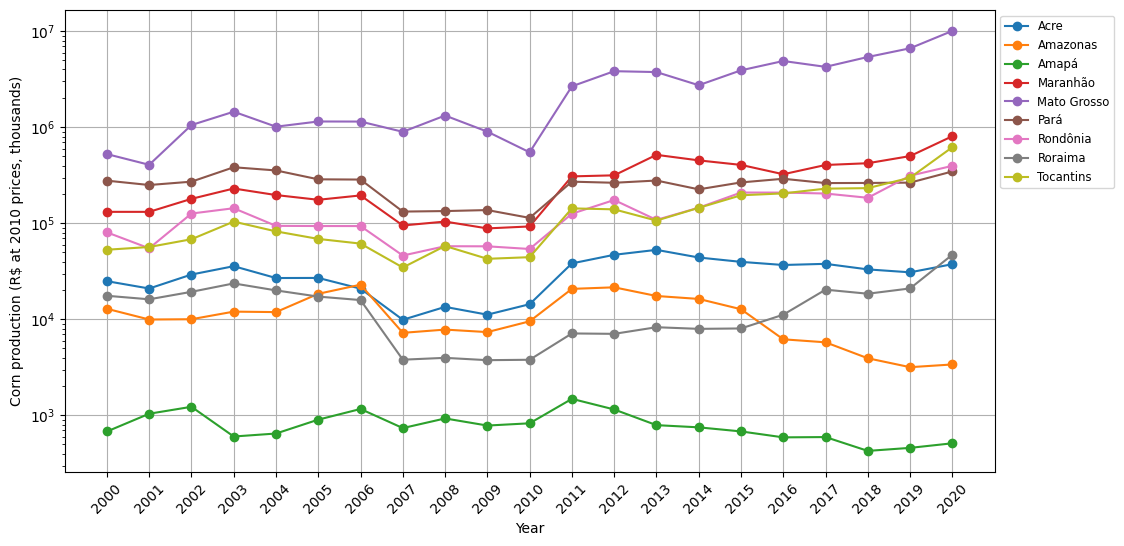

In [163]:

plt.figure(figsize=(12, 6))

# Iterar sobre os estados e siglas para plotar os dados corretamente
for sigla, estado in zip(siglas_milho, estados_milho):
    plt.plot(colunas_anos_milho, df_milho_filtrado[df_milho_filtrado["Sigla"] == sigla].iloc[:, 4:].values.flatten(), 
             marker='o', label=estado)

plt.xlabel("Year")
plt.ylabel("Corn production (R$ at 2010 prices, thousands)")
plt.xticks(colunas_anos_milho, rotation=45)
plt.yscale("log")  # Escala logarítmica
plt.legend(loc="upper left", bbox_to_anchor=(1,1), fontsize="small")
plt.grid(True)

plt.show()


## 3. Área plantada ou colhida (hectares) 🌱

➡️**Resumo:** 

<p>Área plantada: A extensão total das terras onde foram feitas plantações em um determinado período.</p>
<p>Área colhida: A extensão total das terras onde as colheitas foram efetivamente realizadas (pode ser menor que a área plantada devido a perdas).</p>


➡️**Segundo o artigo:**  

<p> A área plantada ou colhida foi identificada como uma das variáveis mais importantes para prever o desmatamento, especialmente em modelos baseados em árvores de decisão, como Random Forest, Gradient Boosting, Decision Tree e Extra Trees.</p>

<p>A análise de importância das variáveis (feature importance) mostrou que a área de cultivos permanentes e a área de cultivos temporários estão entre os principais fatores que influenciam o desmatamento.</p>

<p></p>


### Carregamento do Dataset 📌🌱

In [142]:
df_area_plantada_colhida = pd.read_excel("Área Plantada ou Colhida (hectares)/Área plantada ou destinada à colheita - total.xls")
df_milho.head(11)

,Sigla,Codigo,Estado,1999,2000,2001,2002,2003,2004,2005,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,AC,12,Acre,91787,105167,102604,113139,113362,132684,134582,...,132201,146928,130776,123511,116587,107294,100543,85330,81903,81550
1,AL,27,Alagoas,703112,713725,707909,685171,594087,652276,651244,...,599116,527082,578948,567446,461581,455548,521140,449703,490459,467252
2,AM,13,Amazonas,213964,209183,197059,203935,194653,181457,210503,...,188120,188131,176155,137654,124636,123625,131242,123073,123121,123071
3,AP,16,Amapá,8235,10025,14856,14407,13687,14667,16635,...,25564,24688,28120,43172,34499,37651,42260,36828,37334,38679
4,BA,29,Bahia,3920625,4175399,4059643,4316615,4392635,4671230,4833599,...,4904232,4397344,4515117,4902220,5032413,4574500,4075524,4127884,4122259,4136484
5,CE,23,Ceará,1836602,1930621,1805994,1958333,1965360,1895118,1744157,...,2084945,1732234,1364914,1505816,1508414,1438053,1521932,1471602,1372558,1385916
6,DF,53,Distrito Federal,80475,84690,85252,89818,101584,113182,125313,...,127644,134905,136665,175023,161011,166489,162894,165073,165445,171565
7,ES,32,Espírito Santo,742936,746387,759385,784580,799522,795406,789128,...,694209,687664,675834,658030,652000,616289,584314,567298,558348,565084
8,GO,52,Goiás,3059313,3092529,3152788,3500954,3749736,4307207,4325931,...,4926515,5282270,5635281,6135462,6125209,6345627,6436529,6351417,6676276,6941305
9,MA,21,Maranhão,1180275,1244774,1286775,1327467,1445559,1553114,1640447,...,1788327,1830190,1878533,2006386,1829731,1597851,1810133,1821742,1722710,1719056


### Vizualizar potências tratamentos no Dataset 📌🌱

In [165]:
df_area_plantada_colhida.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Sigla   27 non-null     object
 1   Codigo  27 non-null     int64 
 2   Estado  27 non-null     object
 3   1999    27 non-null     int64 
 4   2000    27 non-null     int64 
 5   2001    27 non-null     int64 
 6   2002    27 non-null     int64 
 7   2003    27 non-null     int64 
 8   2004    27 non-null     int64 
 9   2005    27 non-null     int64 
 10  2006    27 non-null     int64 
 11  2007    27 non-null     int64 
 12  2008    27 non-null     int64 
 13  2009    27 non-null     int64 
 14  2010    27 non-null     int64 
 15  2011    27 non-null     int64 
 16  2012    27 non-null     int64 
 17  2013    27 non-null     int64 
 18  2014    27 non-null     int64 
 19  2015    27 non-null     int64 
 20  2016    27 non-null     int64 
 21  2017    27 non-null     int64 
 22  2018    27 non-null     int6

In [176]:
print(df_area_plantada_colhida.dtypes)  # Verificar os tipos das colunas

Sigla     object
Codigo     int64
Estado    object
1999       int64
2000       int64
2001       int64
2002       int64
2003       int64
2004       int64
2005       int64
2006       int64
2007       int64
2008       int64
2009       int64
2010       int64
2011       int64
2012       int64
2013       int64
2014       int64
2015       int64
2016       int64
2017       int64
2018       int64
2019       int64
2020       int64
dtype: object


### Filtragem dos estados📌🌱

In [167]:
# Lista dos estados que queremos manter
estados_desejados = [
    "Acre", "Roraima", "Rondônia", "Amazonas", "Amapá",
    "Mato Grosso", "Pará", "Tocantins", "Maranhão"
]

# Filtrar apenas os estados desejados
df_area_plantada_colhida_estado_filtrado = df_area_plantada_colhida[df_area_plantada_colhida["Estado"].isin(estados_desejados)].copy()
df_area_plantada_colhida_estado_filtrado = df_area_plantada_colhida_estado_filtrado.set_index("Estado")  # Definir índice como nome do estado

In [172]:
df_area_plantada_colhida_filtrado = df_area_plantada_colhida_estado_filtrado.reset_index()
print(df_area_plantada_colhida_filtrado["Estado"].head(len(estados_desejados)))

0           Acre
1       Amazonas
2          Amapá
3       Maranhão
4    Mato Grosso
5           Pará
6       Rondônia
7        Roraima
8      Tocantins
Name: Estado, dtype: object


### Preparação dos dados para o gráfico 📌🌱

In [178]:
# Selecionar as colunas dos anos
# 0(Sigla) 1(Código) 2(Estado) 3(1999)
colunas_anos_area_plantada_colhida = df_area_plantada_colhida_filtrado.columns[4:] 
print(colunas_anos_area_plantada_colhida)


Index(['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017',
       '2018', '2019', '2020'],
      dtype='object')


In [174]:
# Armazenar as Siglas e os Estados em variáveis separadas
siglas_area_planta_colhida = df_area_plantada_colhida_filtrado["Sigla"]
estados_area_planta_colhida = df_area_plantada_colhida_filtrado["Estado"]
# Exibir Siglas e Estados lado a lado com tabulação
for sigla, estado in zip(siglas_area_planta_colhida,estados_area_planta_colhida):
    print(sigla, "\t", estado)

AC 	 Acre
AM 	 Amazonas
AP 	 Amapá
MA 	 Maranhão
MT 	 Mato Grosso
PA 	 Pará
RO 	 Rondônia
RR 	 Roraima
TO 	 Tocantins


### Processo de Plotação do Gráfico 📌🌱

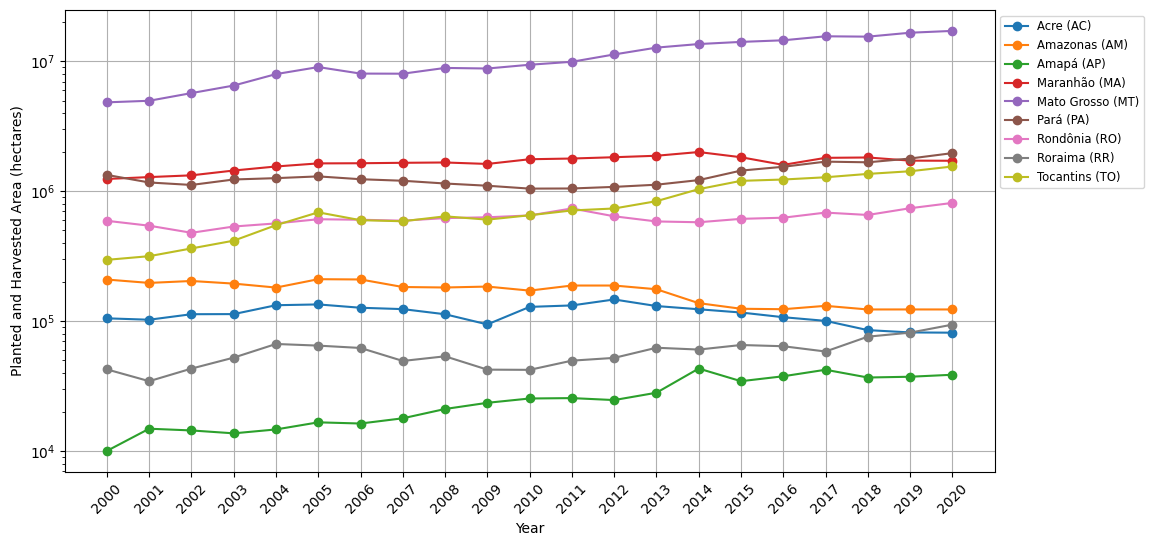

In [181]:
plt.figure(figsize=(12, 6))

# Iterar sobre os estados e siglas para plotar os dados corretamente
for sigla, estado in zip(siglas_area_planta_colhida, estados_area_planta_colhida):
    dados_estado = df_area_plantada_colhida_filtrado[df_area_plantada_colhida_filtrado["Sigla"] == sigla]
    
    if not dados_estado.empty:
        plt.plot(colunas_anos_area_plantada_colhida, dados_estado.iloc[0, 4:].values.flatten(), 
                 marker='o', label=f"{estado} ({sigla})")  # Melhorando a legenda

plt.xlabel("Year")
plt.ylabel("Planted and Harvested Area (hectares)")  # Atualizado para o correto
plt.xticks(colunas_anos_area_plantada_colhida, rotation=45)
plt.yscale("log")  # Escala logarítmica
plt.legend(loc="upper left", bbox_to_anchor=(1, 1), fontsize="small")
plt.grid(True)

plt.show()



## 4. Despesa Orçamentária 💰